In [13]:
import sys
import commentjson as json
sys.path.insert(0, '../src')
import run_reb
import rebound
import numpy as np
import horizons_api
import tools
import pandas as pd
import os


class ReadJson(object):
    def __init__(self, filename):
        print('Read the runprops.txt file')
        self.data = json.load(open(filename))
    def outProps(self):
        return self.data

num = 0    
pairs = ['D4860', 'K13SA0W', 'I3595', 'K20K53G', 'c5437', 'K15G57B', 'o0839', 'K15G58Z', 'q3615', 'K15RR9T', 'q3615', 'K15VG9A', 'q3780', 'K15G58A', 'r1076', 'K20B63Q', 'r5018', 'K21D15N', 'r6919', 'K21L43Y', 'v8833', 'z7103', 'y9222', 'K01QT7Z', 'z2026', 'K15VH3F', 'z2049', 'K15VH0V', 'z2092', 'K15VH3B', 'z2157', 'K15G57G', 'z2174', 'K16R82H', 'z2213', 'K02PH0Z', 'z2333', 'K01QT7Z', 'z2333', 'K15VG8R', 'z2388', 'K13SA0X', 'z2549', 'K15VH2Z', 'z2573', 'K03Q90T', 'z2581', 'K15Ta1P', 'J95K01J', 'K04O12L', 'J99D08E', 'K02G33B', 'J99D08L', 'K01XP4W', 'J99H11S', 'K02G32K', 'J99O03Z', 'K13SA2T', 'K00CA4M', 'K02CF4Y', 'K00CB4N', 'K15VG9S', 'K00F08H', 'K04M08T', 'K00F53S', 'K13SA1C', 'K00GE6X', 'K01OA9G', 'K00P30M', 'K09M10A', 'K00P30M', 'K15VH3M', 'K00P30N', 'K04XJ0X', 'K00P30N', 'K15RS0D', 'K00QM6F', 'K02VD1C', 'K00SX1G', 'K01QT7V', 'K00SX1G', 'K02TU1A', 'K00W12V', 'K03Q91D', 'K01K76Y', 'K15VG5N', 'K01OA8K', 'K13SA0V', 'K01OA8K', 'K15G59C', 'K01OA8Y', 'K13V46L', 'K01OA8Z', 'K05JH9O', 'K01OA8Z', 'K15G56M', 'K01QT7Z', 'K15RR9P', 'K01RE3W', 'K16R82S', 'K02CF4S', 'K13SA1F', 'K02PH0Y', 'K15VH1Y', 'K03H57H', 'K03YH9J', 'K03H57H', 'K07DA1S', 'K03Q91D', 'K15VH2X', 'K03Q91F', 'K15VH3C', 'K03Q91L', 'K15VH3A', 'K04H79K', 'K15G57A', 'K04L32W', 'K21D15Q', 'K04PA7X', 'K07H90V', 'K04PB7W', 'K13TH2L', 'K04U10D', 'K16R82G', 'K04V75Z', 'K20K56A', 'K05B49W', 'K15G56X', 'K05P23H', 'K13RC4J', 'K06A98N', 'K15VH0U', 'K06QI1B', 'K16R82R', 'K06QI1O', 'K15G58C', 'K06QI1O', 'K15VH2F', 'K06UW1K', 'K15VH0O', 'K06UW1S', 'K15G56W', 'K07C66J', 'K15VH1Y', 'K13RF6O', 'K15VH1A', 'K13RF8T', 'K13TM9S', 'K13SA0V', 'K15VH2Z', 'K13SB2M', 'K15VH3G', 'K13TH2L', 'K15G58L', 'K13TI7H', 'K15VH1O', 'K13TI7U', 'K13TI8B', 'K13TM7M', 'K13U18W', 'K13TM8S', 'K15VG9S', 'K13TM8V', 'K20K54J', 'K13TM9O', 'K15VH2Q', 'K13U17L', 'K15VG8Y', 'K13U17R', 'K15VH2A', 'K13U17W', 'K15VG8P', 'K14UR7N', 'K21L43U', 'K15G56X', 'K15VG9B', 'K15G57T', 'K15G58T', 'K15G57T', 'K15VH3F', 'K15G57U', 'K15G58R', 'K15G57U', 'K15VH1B', 'K15G57Z', 'K15VH2E', 'K15G58Y', 'K15VH2H', 'K15G58Y', 'K15VH3G', 'K15G59H', 'K15VH3N', 'K15VG9K', 'K15VH3M', 'K19P02R', 'K19Q06R', 'K20K54F', 'K20K55C']
pairs = ['D4860', 'K13SA0W']

objects = [pairs[2*num], pairs[2*num+1]]

for i in objects:
    filename = 'TNOs/' + str(i)
    if not os.path.isdir(filename):
        os.mkdir(filename)
        
sim= rebound.Simulation()

try:
    flag, epoch, sim = run_reb.initialize_simulation(planets=['jupiter','saturn','uranus','neptune'],des=objects,clones=0)
    com = sim.calculate_com()
    p = []
    for i in objects:
        p.append(sim.particles[i+"_bf"])
except:
    runprops = {}
    runprops['objname'] = objects
    runprops['objtype'] = 'TNO'
    runprops['err_message'] = 'Simulation failed during initialization. Might not be findable in JPL Horizons'
    print(runprops.get('err_message'))
    runprops['run_success'] = False
    runpath = 'TNOs/'+sbody+'/runprops.txt'
    with open(runpath, 'w') as file:
        file.write(json.dumps(runprops, indent = 4))
    sys.exit()

r2d = 180./np.pi
    
tmax = 1e5
tout = 1e3

runprops = {}
runprops['tmax'] = tmax
runprops['tout'] = tout
runprops['objname'] = objects[0]
runprops['objtype'] = 'TNO'
runprops['run_success'] = True

runpath = 'TNOs/'+objects[0]+'/runprops.txt'
with open(runpath, 'w') as file:
    file.write(json.dumps(runprops, indent = 4))

sim = run_reb.run_simulation(sim, tmax=tmax, tout=tout,filename=filename+"/archive.bin",deletefile=True,mindist=20.)


Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:00:15.574927  seconds.


In [14]:
obj1 = sim.particles[0]
obj2 = sim.particles[1]
print(obj1,obj2)
print(sim.dt)

<rebound.particle.Particle object at 0x7f2843976488, m=1.000005976998622 x=-0.00014400183935199385 y=0.0043833946877012454 z=-5.15477406976852e-05 vx=-0.0022023349732622766 vy=-0.00022598028377340378 vz=3.987073706285245e-05> <rebound.particle.Particle object at 0x7f28439c8c80, m=0.0009547919099366 x=1.7315304091428054 y=-5.079285871348597 z=-0.01729584414704867 vx=2.5343043467929935 vy=0.8258111724431163 vz=-0.057689818961709015>
0.27709155354390635


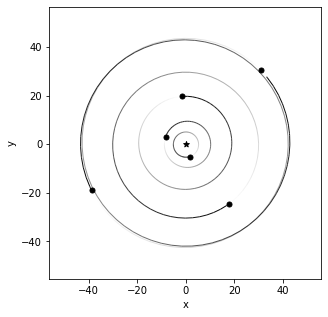

In [15]:
op = rebound.OrbitPlot(sim)

Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:00:15.373055  seconds.
-0.3402140448938061


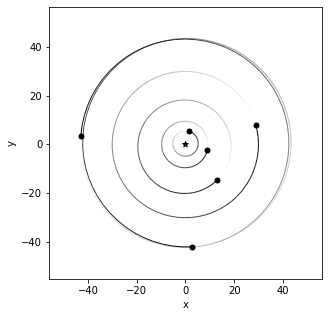

In [16]:
import sys
import commentjson as json
sys.path.insert(0, '../src')
import run_reb
import rebound
import numpy as np
import horizons_api
import tools
import pandas as pd
import os


class ReadJson(object):
    def __init__(self, filename):
        print('Read the runprops.txt file')
        self.data = json.load(open(filename))
    def outProps(self):
        return self.data

num = 0    
pairs = ['D4860', 'K13SA0W', 'I3595', 'K20K53G', 'c5437', 'K15G57B', 'o0839', 'K15G58Z', 'q3615', 'K15RR9T', 'q3615', 'K15VG9A', 'q3780', 'K15G58A', 'r1076', 'K20B63Q', 'r5018', 'K21D15N', 'r6919', 'K21L43Y', 'v8833', 'z7103', 'y9222', 'K01QT7Z', 'z2026', 'K15VH3F', 'z2049', 'K15VH0V', 'z2092', 'K15VH3B', 'z2157', 'K15G57G', 'z2174', 'K16R82H', 'z2213', 'K02PH0Z', 'z2333', 'K01QT7Z', 'z2333', 'K15VG8R', 'z2388', 'K13SA0X', 'z2549', 'K15VH2Z', 'z2573', 'K03Q90T', 'z2581', 'K15Ta1P', 'J95K01J', 'K04O12L', 'J99D08E', 'K02G33B', 'J99D08L', 'K01XP4W', 'J99H11S', 'K02G32K', 'J99O03Z', 'K13SA2T', 'K00CA4M', 'K02CF4Y', 'K00CB4N', 'K15VG9S', 'K00F08H', 'K04M08T', 'K00F53S', 'K13SA1C', 'K00GE6X', 'K01OA9G', 'K00P30M', 'K09M10A', 'K00P30M', 'K15VH3M', 'K00P30N', 'K04XJ0X', 'K00P30N', 'K15RS0D', 'K00QM6F', 'K02VD1C', 'K00SX1G', 'K01QT7V', 'K00SX1G', 'K02TU1A', 'K00W12V', 'K03Q91D', 'K01K76Y', 'K15VG5N', 'K01OA8K', 'K13SA0V', 'K01OA8K', 'K15G59C', 'K01OA8Y', 'K13V46L', 'K01OA8Z', 'K05JH9O', 'K01OA8Z', 'K15G56M', 'K01QT7Z', 'K15RR9P', 'K01RE3W', 'K16R82S', 'K02CF4S', 'K13SA1F', 'K02PH0Y', 'K15VH1Y', 'K03H57H', 'K03YH9J', 'K03H57H', 'K07DA1S', 'K03Q91D', 'K15VH2X', 'K03Q91F', 'K15VH3C', 'K03Q91L', 'K15VH3A', 'K04H79K', 'K15G57A', 'K04L32W', 'K21D15Q', 'K04PA7X', 'K07H90V', 'K04PB7W', 'K13TH2L', 'K04U10D', 'K16R82G', 'K04V75Z', 'K20K56A', 'K05B49W', 'K15G56X', 'K05P23H', 'K13RC4J', 'K06A98N', 'K15VH0U', 'K06QI1B', 'K16R82R', 'K06QI1O', 'K15G58C', 'K06QI1O', 'K15VH2F', 'K06UW1K', 'K15VH0O', 'K06UW1S', 'K15G56W', 'K07C66J', 'K15VH1Y', 'K13RF6O', 'K15VH1A', 'K13RF8T', 'K13TM9S', 'K13SA0V', 'K15VH2Z', 'K13SB2M', 'K15VH3G', 'K13TH2L', 'K15G58L', 'K13TI7H', 'K15VH1O', 'K13TI7U', 'K13TI8B', 'K13TM7M', 'K13U18W', 'K13TM8S', 'K15VG9S', 'K13TM8V', 'K20K54J', 'K13TM9O', 'K15VH2Q', 'K13U17L', 'K15VG8Y', 'K13U17R', 'K15VH2A', 'K13U17W', 'K15VG8P', 'K14UR7N', 'K21L43U', 'K15G56X', 'K15VG9B', 'K15G57T', 'K15G58T', 'K15G57T', 'K15VH3F', 'K15G57U', 'K15G58R', 'K15G57U', 'K15VH1B', 'K15G57Z', 'K15VH2E', 'K15G58Y', 'K15VH2H', 'K15G58Y', 'K15VH3G', 'K15G59H', 'K15VH3N', 'K15VG9K', 'K15VH3M', 'K19P02R', 'K19Q06R', 'K20K54F', 'K20K55C']
pairs = ['D4860', 'K13SA0W']

objects = [pairs[2*num], pairs[2*num+1]]

for i in objects:
    filename = 'TNOs/' + str(i)
    if not os.path.isdir(filename):
        os.mkdir(filename)
        
sim= rebound.Simulation()

try:
    flag, epoch, sim = run_reb.initialize_simulation(planets=['jupiter','saturn','uranus','neptune'],des=objects,clones=0)
    com = sim.calculate_com()
    p = []
    for i in objects:
        p.append(sim.particles[i+"_bf"])
except:
    runprops = {}
    runprops['objname'] = objects
    runprops['objtype'] = 'TNO'
    runprops['err_message'] = 'Simulation failed during initialization. Might not be findable in JPL Horizons'
    print(runprops.get('err_message'))
    runprops['run_success'] = False
    runpath = 'TNOs/'+sbody+'/runprops.txt'
    with open(runpath, 'w') as file:
        file.write(json.dumps(runprops, indent = 4))
    sys.exit()

r2d = 180./np.pi
    
tmax = -1e5
tout = 1e3

runprops = {}
runprops['tmax'] = tmax
runprops['tout'] = tout
runprops['objname'] = objects[0]
runprops['objtype'] = 'TNO'
runprops['run_success'] = True

runpath = 'TNOs/'+objects[0]+'/runprops.txt'
with open(runpath, 'w') as file:
    file.write(json.dumps(runprops, indent = 4))

sim = run_reb.run_simulation(sim, tmax=tmax, tout=tout,filename=filename+"/archive.bin",deletefile=True,mindist=20.)

print(sim.dt)

op = rebound.OrbitPlot(sim)

In [17]:
G = 6.67e-20
hs = 45*(1e18/3/1.989e30)**(1/3)
print(hs)

0.002481002305395798


In [18]:
1e18/1.989e30

5.027652086475616e-13

In [19]:
filename = "TNOs/2015 GW56"
sa = rebound.SimulationArchive(filename+'/archive.bin')
print(len(sa))

10001


(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

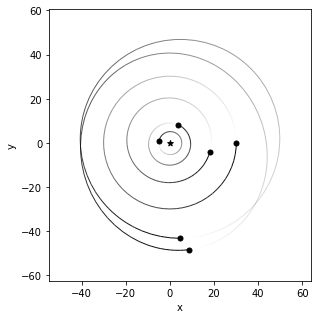

In [24]:
rebound.OrbitPlot(sa[1000])

In [17]:
num = 0    
pairs = ['D4860', 'K13SA0W', 'I3595', 'K20K53G', 'c5437', 'K15G57B', 'o0839', 'K15G58Z', 'q3615', 'K15RR9T', 'q3615', 'K15VG9A', 'q3780', 'K15G58A', 'r1076', 'K20B63Q', 'r5018', 'K21D15N', 'r6919', 'K21L43Y', 'v8833', 'z7103', 'y9222', 'K01QT7Z', 'z2026', 'K15VH3F', 'z2049', 'K15VH0V', 'z2092', 'K15VH3B', 'z2157', 'K15G57G', 'z2174', 'K16R82H', 'z2213', 'K02PH0Z', 'z2333', 'K01QT7Z', 'z2333', 'K15VG8R', 'z2388', 'K13SA0X', 'z2549', 'K15VH2Z', 'z2573', 'K03Q90T', 'z2581', 'K15Ta1P', 'J95K01J', 'K04O12L', 'J99D08E', 'K02G33B', 'J99D08L', 'K01XP4W', 'J99H11S', 'K02G32K', 'J99O03Z', 'K13SA2T', 'K00CA4M', 'K02CF4Y', 'K00CB4N', 'K15VG9S', 'K00F08H', 'K04M08T', 'K00F53S', 'K13SA1C', 'K00GE6X', 'K01OA9G', 'K00P30M', 'K09M10A', 'K00P30M', 'K15VH3M', 'K00P30N', 'K04XJ0X', 'K00P30N', 'K15RS0D', 'K00QM6F', 'K02VD1C', 'K00SX1G', 'K01QT7V', 'K00SX1G', 'K02TU1A', 'K00W12V', 'K03Q91D', 'K01K76Y', 'K15VG5N', 'K01OA8K', 'K13SA0V', 'K01OA8K', 'K15G59C', 'K01OA8Y', 'K13V46L', 'K01OA8Z', 'K05JH9O', 'K01OA8Z', 'K15G56M', 'K01QT7Z', 'K15RR9P', 'K01RE3W', 'K16R82S', 'K02CF4S', 'K13SA1F', 'K02PH0Y', 'K15VH1Y', 'K03H57H', 'K03YH9J', 'K03H57H', 'K07DA1S', 'K03Q91D', 'K15VH2X', 'K03Q91F', 'K15VH3C', 'K03Q91L', 'K15VH3A', 'K04H79K', 'K15G57A', 'K04L32W', 'K21D15Q', 'K04PA7X', 'K07H90V', 'K04PB7W', 'K13TH2L', 'K04U10D', 'K16R82G', 'K04V75Z', 'K20K56A', 'K05B49W', 'K15G56X', 'K05P23H', 'K13RC4J', 'K06A98N', 'K15VH0U', 'K06QI1B', 'K16R82R', 'K06QI1O', 'K15G58C', 'K06QI1O', 'K15VH2F', 'K06UW1K', 'K15VH0O', 'K06UW1S', 'K15G56W', 'K07C66J', 'K15VH1Y', 'K13RF6O', 'K15VH1A', 'K13RF8T', 'K13TM9S', 'K13SA0V', 'K15VH2Z', 'K13SB2M', 'K15VH3G', 'K13TH2L', 'K15G58L', 'K13TI7H', 'K15VH1O', 'K13TI7U', 'K13TI8B', 'K13TM7M', 'K13U18W', 'K13TM8S', 'K15VG9S', 'K13TM8V', 'K20K54J', 'K13TM9O', 'K15VH2Q', 'K13U17L', 'K15VG8Y', 'K13U17R', 'K15VH2A', 'K13U17W', 'K15VG8P', 'K14UR7N', 'K21L43U', 'K15G56X', 'K15VG9B', 'K15G57T', 'K15G58T', 'K15G57T', 'K15VH3F', 'K15G57U', 'K15G58R', 'K15G57U', 'K15VH1B', 'K15G57Z', 'K15VH2E', 'K15G58Y', 'K15VH2H', 'K15G58Y', 'K15VH3G', 'K15G59H', 'K15VH3N', 'K15VG9K', 'K15VH3M', 'K19P02R', 'K19Q06R', 'K20K54F', 'K20K55C']
for j in range(int(len(pairs)/2)):
    objects = [pairs[2*j], pairs[2*j+1]]

    for i in objects:
        filename = 'TNOs/' + str(i)
        if not os.path.isdir(filename):
            os.mkdir(filename)
        
    sim= rebound.Simulation()

    try:
        flag, epoch, sim = run_reb.initialize_simulation(planets=['jupiter','saturn','uranus','neptune'],des=objects,clones=0)
        com = sim.calculate_com()
        p = []
        for i in objects:
            p.append(sim.particles[i+"_bf"])
    except:
        runprops = {}
        runprops['objname'] = objects
        runprops['objtype'] = 'TNO'
        runprops['err_message'] = 'Simulation failed during initialization. Might not be findable in JPL Horizons'
        print(runprops.get('err_message'))
        runprops['run_success'] = False
        runpath = 'TNOs/'+sbody+'/runprops.txt'
        with open(runpath, 'w') as file:
            file.write(json.dumps(runprops, indent = 4))
        sys.exit()

    r2d = 180./np.pi
    
    tmax = -1e6
    tout = 1e2

    runprops = {}
    runprops['tmax'] = tmax
    runprops['tout'] = tout
    runprops['objname'] = objects[0]
    runprops['objtype'] = 'TNO'
    runprops['run_success'] = True

    runpath = 'TNOs/'+objects[0]+'/runprops.txt'
    with open(runpath, 'w') as file:
        file.write(json.dumps(runprops, indent = 4))

    sim = run_reb.run_simulation(sim, tmax=tmax, tout=tout,filename=filename+"/archive.bin",deletefile=True,mindist=20.)


Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:02:41.601383  seconds.
Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:02:41.501713  seconds.
Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:02:41.340041  seconds.
Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:02:41.422424  seconds.
Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:02:41.545860  seconds.
Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finish

Simulation integration finished in  0:02:41.574419  seconds.
Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:02:41.181631  seconds.
Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:02:41.787667  seconds.
Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:02:42.131652  seconds.
Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:02:41.512601  seconds.
Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:02:41.552741  seconds.
Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
M

Simulation integration finished in  0:02:41.846234  seconds.
Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:02:41.411220  seconds.
Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:04:13.813141  seconds.
Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:02:19.281961  seconds.


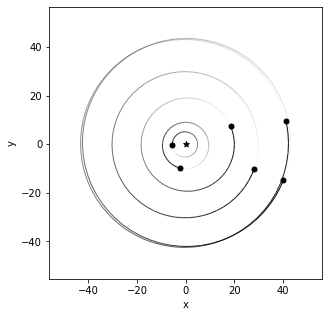

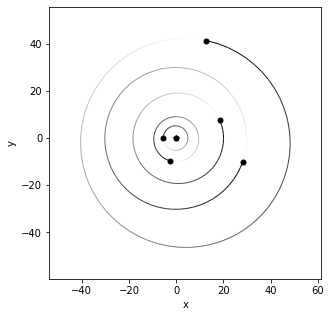

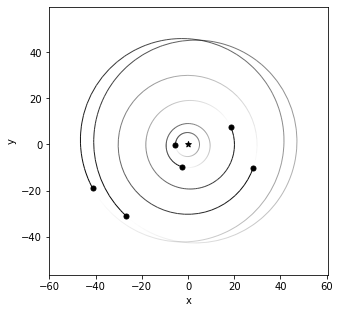

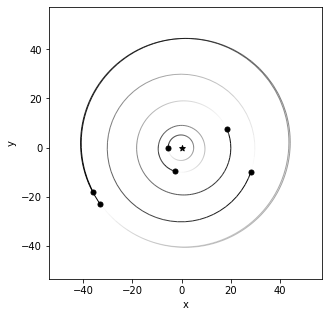

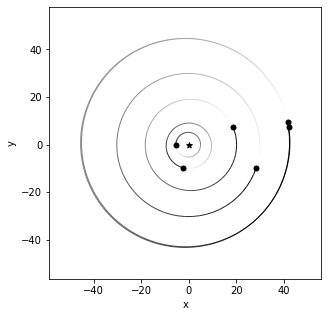

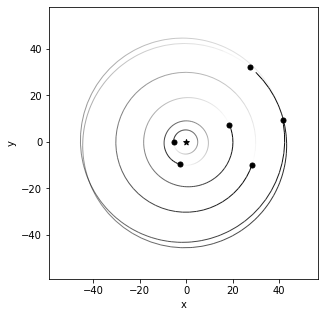

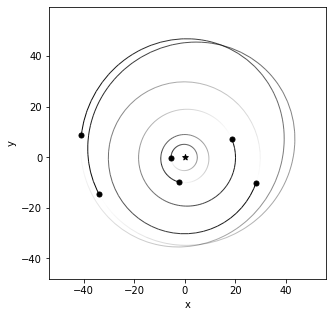

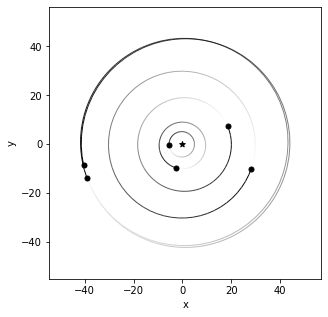

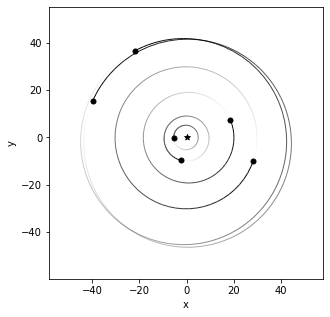

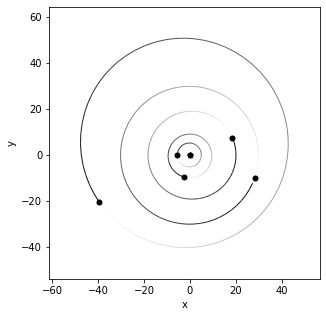

In [19]:
for i in range(0*10,1*10):
    filename = "TNOs/"+pairs[2*i+1]
    #print(i)
    sa = rebound.SimulationArchive(filename+'/archive.bin')
    try:
        rebound.OrbitPlot(sa[0])
    except:
        continue


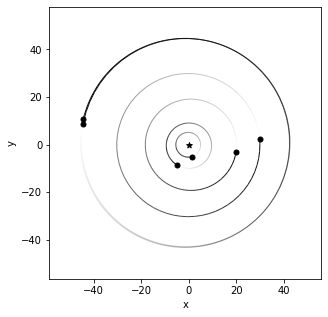

In [84]:
for i in range(4,5):
    filename = "TNOs/"+pairs[2*i+1]
    #print(i)
    sa = rebound.SimulationArchive(filename+'/archive.bin')
    try:
        rebound.OrbitPlot(sa[10])
    except:
        continue


In [1]:
import sys
import commentjson as json
sys.path.insert(0, '../src')
import run_reb
import rebound
import numpy as np
import horizons_api
import tools
import pandas as pd
import os
num = 0    
pairs = ['D4860', 'K13SA0W', 'I3595', 'K20K53G', 'c5437', 'K15G57B', 'o0839', 'K15G58Z', 'q3615', 'K15RR9T', 'q3615', 'K15VG9A', 'q3780', 'K15G58A', 'r1076', 'K20B63Q', 'r5018', 'K21D15N', 'r6919', 'K21L43Y', 'v8833', 'z7103', 'y9222', 'K01QT7Z', 'z2026', 'K15VH3F', 'z2049', 'K15VH0V', 'z2092', 'K15VH3B', 'z2157', 'K15G57G', 'z2174', 'K16R82H', 'z2213', 'K02PH0Z', 'z2333', 'K01QT7Z', 'z2333', 'K15VG8R', 'z2388', 'K13SA0X', 'z2549', 'K15VH2Z', 'z2573', 'K03Q90T', 'z2581', 'K15Ta1P', 'J95K01J', 'K04O12L', 'J99D08E', 'K02G33B', 'J99D08L', 'K01XP4W', 'J99H11S', 'K02G32K', 'J99O03Z', 'K13SA2T', 'K00CA4M', 'K02CF4Y', 'K00CB4N', 'K15VG9S', 'K00F08H', 'K04M08T', 'K00F53S', 'K13SA1C', 'K00GE6X', 'K01OA9G', 'K00P30M', 'K09M10A', 'K00P30M', 'K15VH3M', 'K00P30N', 'K04XJ0X', 'K00P30N', 'K15RS0D', 'K00QM6F', 'K02VD1C', 'K00SX1G', 'K01QT7V', 'K00SX1G', 'K02TU1A', 'K00W12V', 'K03Q91D', 'K01K76Y', 'K15VG5N', 'K01OA8K', 'K13SA0V', 'K01OA8K', 'K15G59C', 'K01OA8Y', 'K13V46L', 'K01OA8Z', 'K05JH9O', 'K01OA8Z', 'K15G56M', 'K01QT7Z', 'K15RR9P', 'K01RE3W', 'K16R82S', 'K02CF4S', 'K13SA1F', 'K02PH0Y', 'K15VH1Y', 'K03H57H', 'K03YH9J', 'K03H57H', 'K07DA1S', 'K03Q91D', 'K15VH2X', 'K03Q91F', 'K15VH3C', 'K03Q91L', 'K15VH3A', 'K04H79K', 'K15G57A', 'K04L32W', 'K21D15Q', 'K04PA7X', 'K07H90V', 'K04PB7W', 'K13TH2L', 'K04U10D', 'K16R82G', 'K04V75Z', 'K20K56A', 'K05B49W', 'K15G56X', 'K05P23H', 'K13RC4J', 'K06A98N', 'K15VH0U', 'K06QI1B', 'K16R82R', 'K06QI1O', 'K15G58C', 'K06QI1O', 'K15VH2F', 'K06UW1K', 'K15VH0O', 'K06UW1S', 'K15G56W', 'K07C66J', 'K15VH1Y', 'K13RF6O', 'K15VH1A', 'K13RF8T', 'K13TM9S', 'K13SA0V', 'K15VH2Z', 'K13SB2M', 'K15VH3G', 'K13TH2L', 'K15G58L', 'K13TI7H', 'K15VH1O', 'K13TI7U', 'K13TI8B', 'K13TM7M', 'K13U18W', 'K13TM8S', 'K15VG9S', 'K13TM8V', 'K20K54J', 'K13TM9O', 'K15VH2Q', 'K13U17L', 'K15VG8Y', 'K13U17R', 'K15VH2A', 'K13U17W', 'K15VG8P', 'K14UR7N', 'K21L43U', 'K15G56X', 'K15VG9B', 'K15G57T', 'K15G58T', 'K15G57T', 'K15VH3F', 'K15G57U', 'K15G58R', 'K15G57U', 'K15VH1B', 'K15G57Z', 'K15VH2E', 'K15G58Y', 'K15VH2H', 'K15G58Y', 'K15VH3G', 'K15G59H', 'K15VH3N', 'K15VG9K', 'K15VH3M', 'K19P02R', 'K19Q06R', 'K20K54F', 'K20K55C']
for j in range(4,5):
    objects = [pairs[2*j], pairs[2*j+1]]

    for i in objects:
        filename = 'TNOs/' + str(i)
        if not os.path.isdir(filename):
            os.mkdir(filename)
        
    sim= rebound.Simulation()

    try:
        flag, epoch, sim = run_reb.initialize_simulation(planets=['jupiter','saturn','uranus','neptune'],des=objects,clones=0)
        com = sim.calculate_com()
        p = []
        for i in objects:
            p.append(sim.particles[i+"_bf"])
    except:
        runprops = {}
        runprops['objname'] = objects
        runprops['objtype'] = 'TNO'
        runprops['err_message'] = 'Simulation failed during initialization. Might not be findable in JPL Horizons'
        print(runprops.get('err_message'))
        runprops['run_success'] = False
        runpath = 'TNOs/'+sbody+'/runprops.txt'
        with open(runpath, 'w') as file:
            file.write(json.dumps(runprops, indent = 4))
        sys.exit()

    r2d = 180./np.pi
    
    tmax = 1e6
    tout = 1e2

    runprops = {}
    runprops['tmax'] = tmax
    runprops['tout'] = tout
    runprops['objname'] = objects[0]
    runprops['objtype'] = 'TNO'
    runprops['run_success'] = True

    runpath = 'TNOs/'+objects[0]+'/runprops.txt'
    with open(runpath, 'w') as file:
        file.write(json.dumps(runprops, indent = 4))

    sim = run_reb.run_simulation(sim, tmax=tmax, tout=tout,filename=filename+"/archive2.bin",deletefile=True,mindist=20.)


Sim made
Data Read
Sim starting
Backwards integration timestep
Adding planets
Move to com
Starting Integration
Simulation integration finished in  0:02:42.040765  seconds.


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:712: RuntimeWarning: At least one test particle (type 0) has finite mass. This might lead to unexpected behaviour. Set testparticle_hidewarnings=1 to hide this warning.
  warnings.warn(msg[1:], RuntimeWarning)


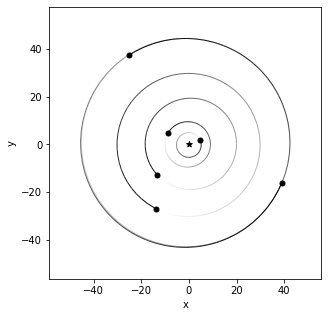

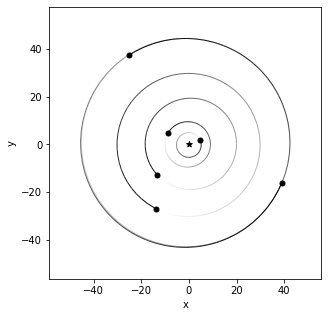

In [7]:
num = 250
for i in range(4,5):
    filename = "TNOs/"+pairs[2*i+1]
    #print(i)
    sa = rebound.SimulationArchive(filename+'/archive2.bin')
    try:
        rebound.OrbitPlot(sa[num])
    except:
        continue
for i in range(4,5):
    filename = "TNOs/"+pairs[2*i+1]
    #print(i)
    sa = rebound.SimulationArchive(filename+'/archive.bin')
    try:
        rebound.OrbitPlot(sa[num])
    except:
        continue